<a href="https://colab.research.google.com/github/TechJas/Prediction-The-Tumor/blob/main/breast_cancer_pipeline_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#>***Cancer PREDICTION MODEL (B/ M)***:📊
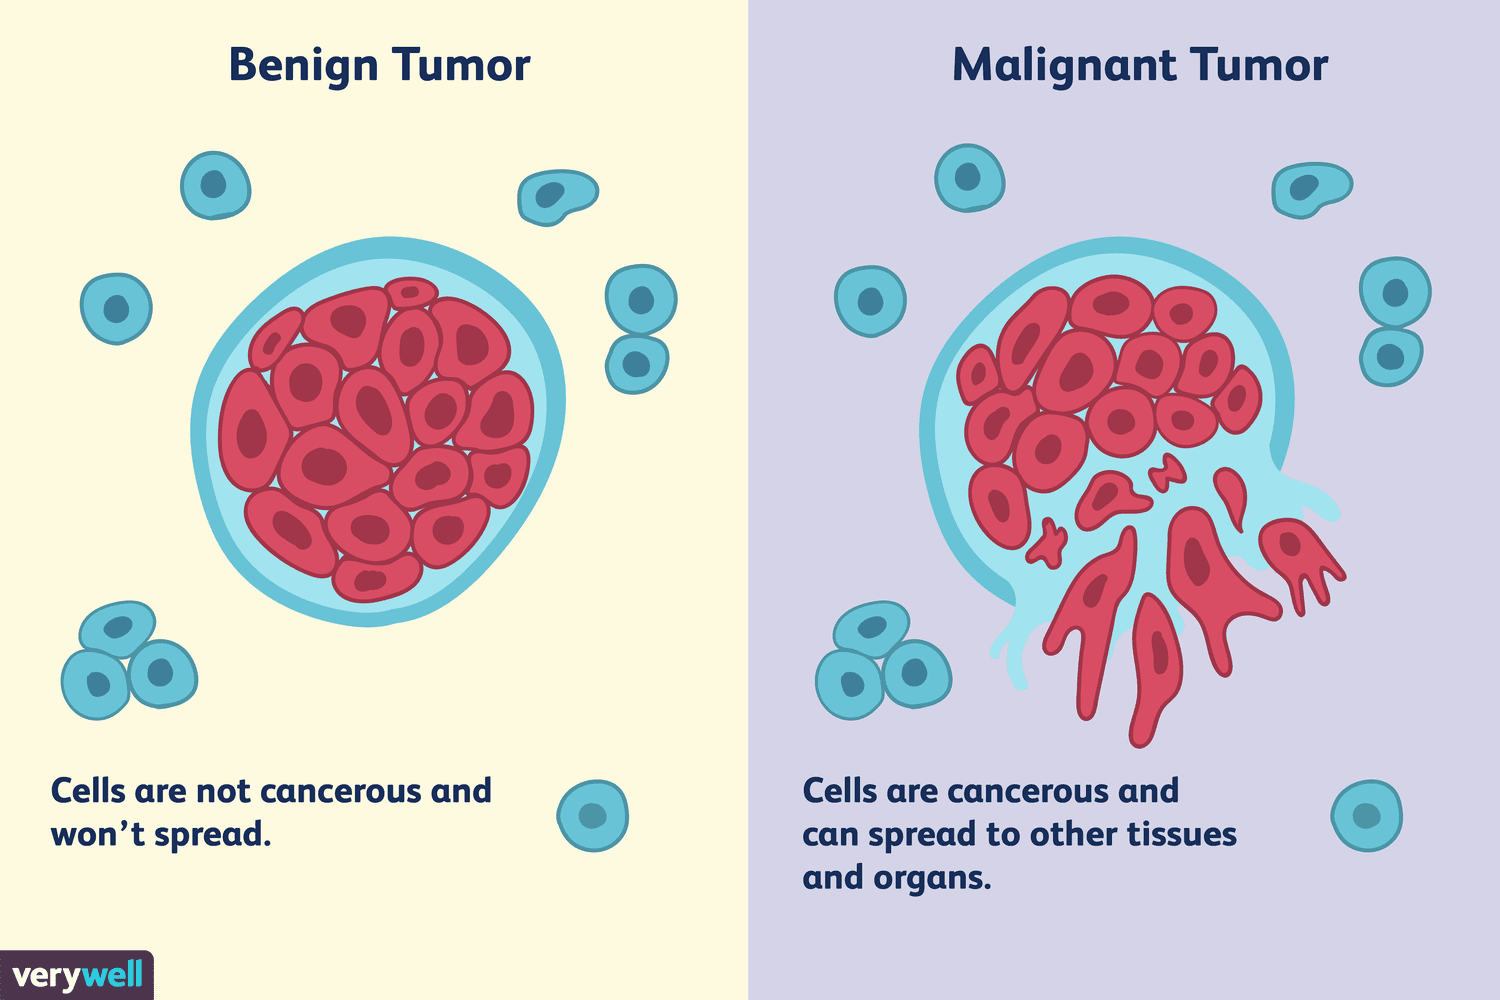


Found previously saved data at 'uploaded_dataset.pkl'.
---

Loading old data...
---
Dataset shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Dataset after selecting features and dropping NaNs:
Dataset shape: (569, 14)


,radius_mean,perimeter_mean,area_mean,concavity_mean,radius_worst,concavity_worst,texture_mean,compactness_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,area_worst,perimeter_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,25.38,0.7119,10.38,0.27760,0.11840,0.2419,0.07871,2019.0,184.60,M
1,20.57,132.90,1326.0,0.0869,24.99,0.2416,17.77,0.07864,0.08474,0.1812,0.05667,1956.0,158.80,M
2,19.69,130.00,1203.0,0.1974,23.57,0.4504,21.25,0.15990,0.10960,0.2069,0.05999,1709.0,152.50,M
3,11.42,77.58,386.1,0.2414,14.91,0.6869,20.38,0.28390,0.14250,0.2597,0.09744,567.7,98.87,M
4,20.29,135.10,1297.0,0.1980,22.54,0.4000,14.34,0.13280,0.10030,0.1809,0.05883,1575.0,152.20,M



Preprocessing complete. Data split and scaled.

Training RandomForest model...
Model training complete.

Evaluating model...
Model Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Model evaluation complete.

Generating Charts...
Generating Boxplots...


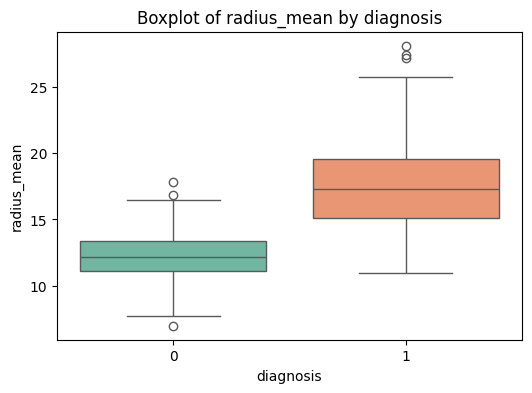

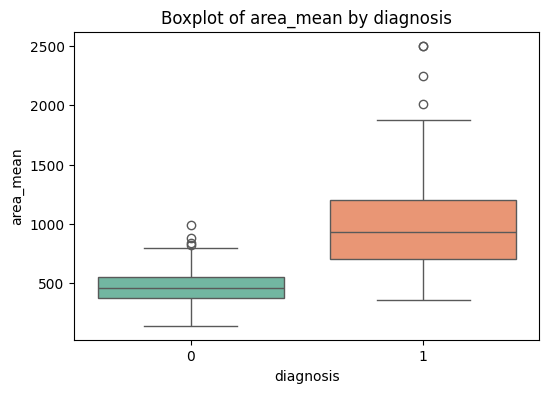

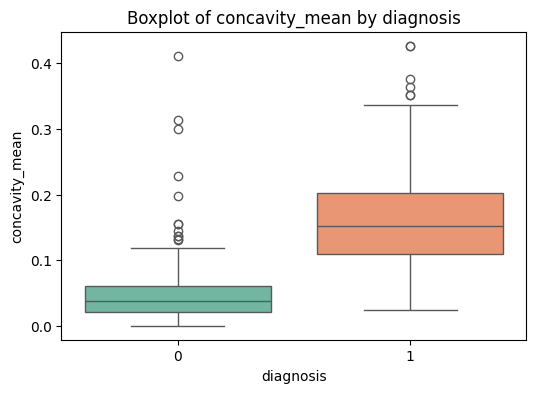

Generating Correlation Heatmap...


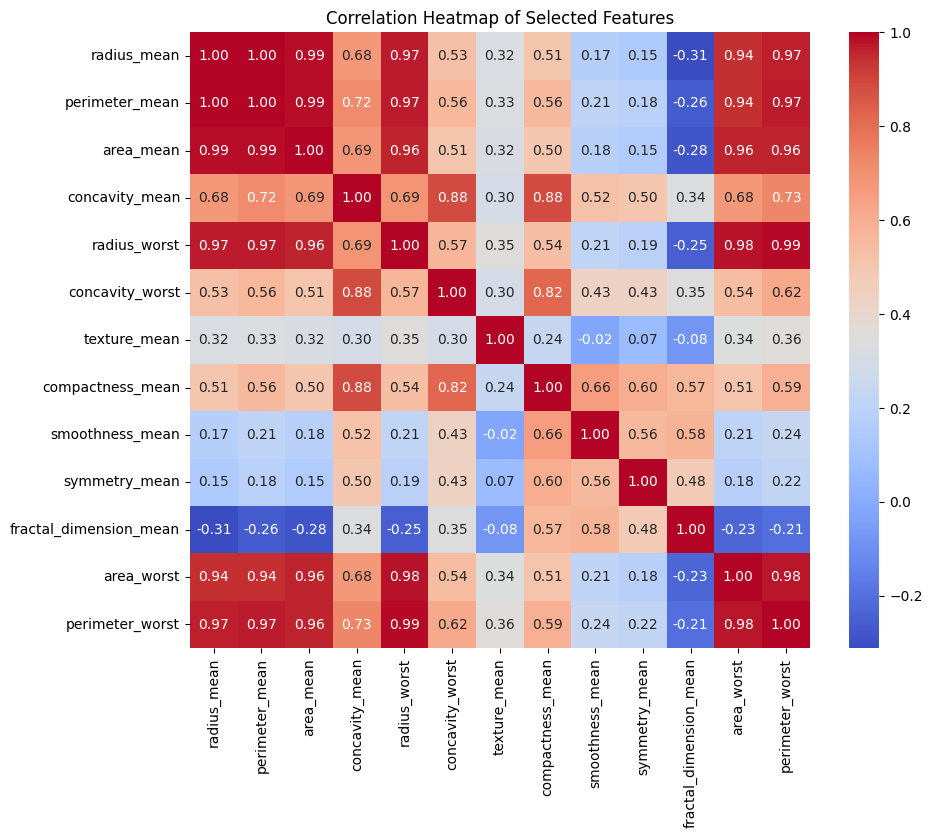

Generating Feature Importance Plot...


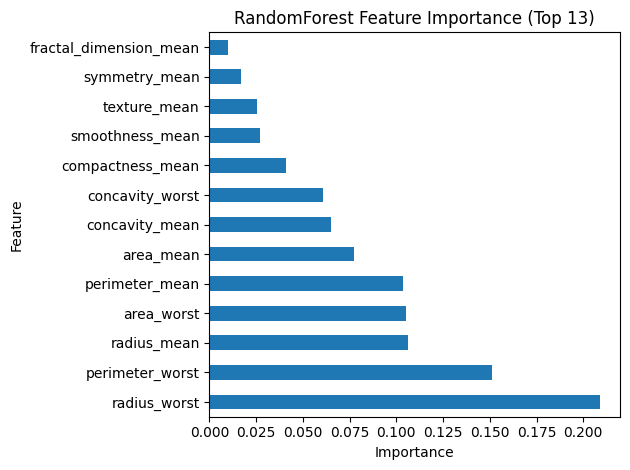

Generating Scatterplots...


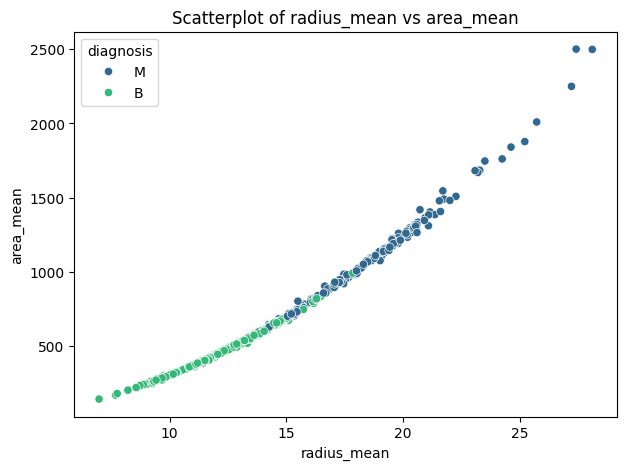


Chart generation complete.

--- Enter patient details for prediction ---

Please enter numeric values for the following parameters:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
import io # Import the io module for handling file uploads
import os # Import os module for checking file existence

# --- Configuration ---
# Features specified by the user
selected_features = [
    "radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave_points_mean",
    "radius_worst", "concavity_worst", "texture_mean", "compactness_mean", "smoothness_mean",
    "symmetry_mean", "fractal_dimension_mean", "area_worst", "perimeter_worst"
]
target_col = "diagnosis" # Assuming this is the target column name
saved_data_path = "uploaded_dataset.pkl" # Define a path to save the processed data

# --- Step 1: Load Data ---
dataset = None

# Check if the saved data file exists
if os.path.exists(saved_data_path):
    print(f"Found previously saved data at '{saved_data_path}'.")
    print("---") # Added separator
    while True:
        choice = input("Do you want to load the old data? (yes/no): ").lower()
        if choice in ['yes', 'y']:
            try:
                dataset = pd.read_pickle(saved_data_path)
                print("\nLoading old data...") # Added newline
                break # Exit the loop if loading is successful
            except Exception as e:
                print(f"Error loading old data: {e}")
                print("Proceeding to upload a new file instead.")
                break # Exit the loop to proceed to upload
        elif choice in ['no', 'n']:
            print("\nProceeding to upload a new file.") # Added newline
            break # Exit the loop to proceed to upload
        else:
            print("Invalid choice. Please enter 'yes' or 'no'.")
    print("---") # Added separator


# If dataset is still None, it means we need to upload a new file
if dataset is None:
    print("Please upload your dataset (CSV, Excel, or JSON):")
    uploaded = files.upload()

    file_name = list(uploaded.keys())[0] # Get the name of the uploaded file

    try:
        if file_name.endswith('.csv'):
            # Use io.BytesIO for reading from the uploaded dictionary
            dataset = pd.read_csv(io.BytesIO(uploaded[file_name]))
        elif file_name.endswith(('.xlsx', '.xls')):
             dataset = pd.read_excel(io.BytesIO(uploaded[file_name]))
        elif file_name.endswith('.json'):
             dataset = pd.read_json(io.BytesIO(uploaded[file_name]))
        else:
            raise ValueError("Unsupported file type. Please upload CSV, Excel, or JSON.")
        print(f"\nDataset '{file_name}' Loaded Successfully!")

        # Save the newly uploaded and loaded dataset
        # We will save the dataset *before* dropping columns or NaNs,
        # so that the full original uploaded data is preserved.
        try:
            dataset.to_pickle(saved_data_path)
            print(f"Dataset saved to '{saved_data_path}' for future use.")
        except Exception as e:
            print(f"Warning: Could not save dataset to '{saved_data_path}': {e}")

    except Exception as e:
        print(f"Error loading new file: {e}")
        # Exit or handle the error appropriately if data loading fails
        # For now, we'll stop execution if loading fails
        raise

print("Dataset shape:", dataset.shape)
display(dataset.head())


# --- Step 2: Select Features and Preprocessing ---
# Ensure selected features and target column exist in the dataset
all_cols = selected_features + [target_col]
# Check if all selected features are in the dataset
missing_features = [col for col in selected_features if col not in dataset.columns]
if missing_features:
    print(f"Warning: The following selected features are missing from the dataset and will be ignored: {missing_features}")
    # Update selected_features to only include existing ones
    selected_features = [col for col in selected_features if col in dataset.columns]

if target_col not in dataset.columns:
     raise ValueError(f"Target column '{target_col}' not found in the dataset.")


df = dataset[selected_features + [target_col]].copy()

# Drop rows with missing values in the selected columns and target
df.dropna(subset=selected_features + [target_col], inplace=True)

print("\nDataset after selecting features and dropping NaNs:")
print("Dataset shape:", df.shape)
display(df.head())


# Encode target variable
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col]) # M=1, B=0 (or vice versa depending on data)
target_names = le.classes_ # Store class names for classification report

# Define features (X) and target (y)
X = df[selected_features]
y = df[target_col]

# Split data
# Using stratify=y to maintain the proportion of target variable in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing complete. Data split and scaled.")

# --- Step 3: Train Model ---
print("\nTraining RandomForest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- Step 4: Evaluate Model ---
print("\nEvaluating model...")
y_pred = model.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Model evaluation complete.")

# --- Step 5: Generate Charts ---
print("\nGenerating Charts...")

# Boxplots
boxplot_features = ["radius_mean", "area_mean", "concavity_mean"]
print("Generating Boxplots...")
for feature in boxplot_features:
    if feature in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target_col, y=feature, data=df, palette="Set2")
        plt.title(f"Boxplot of {feature} by {target_col}")
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the dataset for boxplot.")


# Correlation Heatmap
print("Generating Correlation Heatmap...")
# Ensure only numeric columns are included for correlation calculation
numeric_df = df[selected_features].select_dtypes(include=np.number)
if not numeric_df.empty:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Selected Features")
    plt.show()
else:
    print("No numeric features available to generate Correlation Heatmap.")

# Feature Importance (from RandomForest model)
print("Generating Feature Importance Plot...")
if hasattr(model, 'feature_importances_') and len(selected_features) > 0:
    # Ensure feature names match the scaled data used for training
    feature_importances = pd.Series(model.feature_importances_, index=selected_features)
    # Sort and plot top features (or all if less than 15)
    top_n = min(15, len(selected_features))
    feature_importances.nlargest(top_n).plot(kind='barh')
    plt.title("RandomForest Feature Importance (Top {})".format(top_n))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
elif len(selected_features) == 0:
     print("No features selected to generate Feature Importance Plot.")
else:
    print("Model does not have feature_importances_ attribute or no features were used for training.")


# Scatterplots
scatterplot_pairs = [("radius_mean", "area_mean")]
print("Generating Scatterplots...")
for x_feature, y_feature in scatterplot_pairs:
    if x_feature in df.columns and y_feature in df.columns:
        plt.figure(figsize=(7, 5))
        # Use original diagnosis labels for hue in scatterplot
        sns.scatterplot(data=dataset, x=x_feature, y=y_feature, hue=target_col, palette="viridis")
        plt.title(f"Scatterplot of {x_feature} vs {y_feature}")
        plt.show()
    else:
         print(f"Scatterplot features '{x_feature}' or '{y_feature}' not found in the dataset.")

print("\nChart generation complete.")

# --- Step 6: User Input for Prediction ---
print("\n--- Enter patient details for prediction ---")
user_input = {}

print("\nPlease enter numeric values for the following parameters:")
for col in selected_features:
    while True: # Loop to ensure valid numeric input
        try:
            val_str = input(f"Enter value for {col}: ")
            val = float(val_str)
            user_input[col] = val
            break # Exit loop if input is valid
        except ValueError:
            print(f"Invalid input: '{val_str}'. Please enter a numeric value for {col}.")
        except EOFError:
            print("\nInput stream closed unexpectedly. Cannot get input.")
            # Optionally break or handle this error
            raise # Re-raise the exception to stop execution

# Convert user input to DataFrame and scale
user_df = pd.DataFrame([user_input])

# Ensure the order of columns in user_df matches the order used during training (selected_features)
try:
    user_df = user_df[selected_features]
except KeyError as e:
    print(f"Error: Missing input for required feature: {e}")
    # Exit or handle the error if required features were not provided
    raise

# Scale the user input using the same scaler fitted on the training data
user_array_scaled = scaler.transform(user_df)

# Predict
prediction_numeric = model.predict(user_array_scaled)[0]
prediction_label = le.inverse_transform([prediction_numeric])[0]

print(f"\nPrediction Result: The tumor is predicted to be **{prediction_label.upper()}**")